In [2]:
import requests
from bs4 import BeautifulSoup as soup
import nltk
import spacy
nltk.download("stopwords")
nltk.download('punkt')
nltk.download('vader_lexicon')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import FreqDist
from spacy import displacy
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from wordcloud import WordCloud
from textblob import TextBlob

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


we are using requests module to make a HTTP request to get 
all the information((content, encoding, status,etc)of the requested page


In [3]:
url = "https://finshots.in/archive/look-ma-india-is-shining/"
req = requests.get(url)
# doc = soup(req.text)
# print(doc.prettify())

In [4]:
req.text

'<!DOCTYPE html>\n<html lang="en">\n\n<head>\n\n    <meta charset="utf-8" />\n    <meta http-equiv="X-UA-Compatible" content="IE=edge" />\n\n    <title>Look Ma, India is shining!</title>\n    <meta name="HandheldFriendly" content="True" />\n    <meta name="viewport" content="width=device-width, initial-scale=1.0" />\n\n    <link rel="stylesheet" type="text/css" href="/assets/built/screen.css?v=c064f220bd" />\n    <link rel="stylesheet" type="text/css" href="/assets/built/style.min.css?v=c064f220bd" />\n\n    <meta name="description" content="An explainer on how satellite images of night time lighting can be used to measure economic progress" />\n    <link rel="shortcut icon" href="/favicon.png" type="image/png" />\n    <link rel="canonical" href="https://finshots.in/archive/look-ma-india-is-shining/" />\n    <meta name="referrer" content="no-referrer-when-downgrade" />\n    \n    <meta property="og:site_name" content="Finshots" />\n    <meta property="og:type" content="article" />\n   

In [5]:
req.encoding

'utf-8'

Creating a BeautifulSoup object with the help of response object received above

In [6]:
doc = soup(req.text)
text = doc.get_text()

In [7]:
text

'\n\n\n\nLook Ma, India is shining!\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n{\n    "@context": "https://schema.org",\n    "@graph": [\n        {\n            "@type": "NewsArticle",\n            "publisher": {\n                "@type": "Organization",\n                "name": "Finshots",\n                "logo": {\n                    "@type": "ImageObject",\n                    "url": "https://d3jlwjv6gmyigl.cloudfront.net/images/2019/08/logo_horizontal.png"\n                }\n            },\n            "author": {\n                "@type": "Person",\n                "name": "Shrehith Karkera",\n                "url": "https://finshots.in/author/shrehith/",\n                "sameAs": [\n                    "https://twitter.com/shrehithk"\n                ]\n            },\n            "headline": "Look Ma, India is shining!",\n            "url": "https://finshots.in/archive/look-ma-india-is-shining/",\n            "datePublished": "2022-02-04T01:30:00.000Z",

In [8]:
len(text)

14257

Extracting out the main text of the article,since that is what we want to explore and perform sentiment analysis on

In [9]:
# printing the text
# text[5520:11000]
text[5520:10900]

"22\n/ Economy\n\nLook Ma, India is shining!\n\n\n\n\n\n\nYes, we know we’ve written a lot about economics this week, but bear with us for one more day? Because in today’s Finshots we explore a chapter from the Economic Survey that has gone pretty viral. And viral is always exciting, no?\nEconomy\nThe StoryHave you ever revisited a town after many years only to look at the scenery and go\u200a—\u200a“Damn this place has changed a lot? Lights everywhere it seems.”Well, you wouldn’t be alone. If a place is well lit at night, it probably tells you there’s something brewing there. Think about it\u200a—\u200aArtificial lights often equate to more houses, more shops and a higher population density. It gives you a good estimate of electricity consumption. It can tell you about economic progress and a whole host of other things.And this was made apparent when the Economic Survey 2021–2022 dedicated a whole chapter to the subject calling it\u200a—\u200aTracking development using satellite image

In [10]:
# the main text of the article is present within characters 5520:10900
main_text = text[5520:10900]

In [11]:
type(main_text)

str

In [12]:
# getting a list if the words in the text excluding the stop words
words_in_text = word_tokenize(main_text)
words_in_text


['22',
 '/',
 'Economy',
 'Look',
 'Ma',
 ',',
 'India',
 'is',
 'shining',
 '!',
 'Yes',
 ',',
 'we',
 'know',
 'we',
 '’',
 've',
 'written',
 'a',
 'lot',
 'about',
 'economics',
 'this',
 'week',
 ',',
 'but',
 'bear',
 'with',
 'us',
 'for',
 'one',
 'more',
 'day',
 '?',
 'Because',
 'in',
 'today',
 '’',
 's',
 'Finshots',
 'we',
 'explore',
 'a',
 'chapter',
 'from',
 'the',
 'Economic',
 'Survey',
 'that',
 'has',
 'gone',
 'pretty',
 'viral',
 '.',
 'And',
 'viral',
 'is',
 'always',
 'exciting',
 ',',
 'no',
 '?',
 'Economy',
 'The',
 'StoryHave',
 'you',
 'ever',
 'revisited',
 'a',
 'town',
 'after',
 'many',
 'years',
 'only',
 'to',
 'look',
 'at',
 'the',
 'scenery',
 'and',
 'go',
 '—',
 '“',
 'Damn',
 'this',
 'place',
 'has',
 'changed',
 'a',
 'lot',
 '?',
 'Lights',
 'everywhere',
 'it',
 'seems.',
 '”',
 'Well',
 ',',
 'you',
 'wouldn',
 '’',
 't',
 'be',
 'alone',
 '.',
 'If',
 'a',
 'place',
 'is',
 'well',
 'lit',
 'at',
 'night',
 ',',
 'it',
 'probably',
 'te

In [13]:
stop_words = set(stopwords.words("english"))

In [14]:
filtered_list = [
    word for word in words_in_text if word.casefold() not in stop_words]

filtered_list

['22',
 '/',
 'Economy',
 'Look',
 ',',
 'India',
 'shining',
 '!',
 'Yes',
 ',',
 'know',
 '’',
 'written',
 'lot',
 'economics',
 'week',
 ',',
 'bear',
 'us',
 'one',
 'day',
 '?',
 'today',
 '’',
 'Finshots',
 'explore',
 'chapter',
 'Economic',
 'Survey',
 'gone',
 'pretty',
 'viral',
 '.',
 'viral',
 'always',
 'exciting',
 ',',
 '?',
 'Economy',
 'StoryHave',
 'ever',
 'revisited',
 'town',
 'many',
 'years',
 'look',
 'scenery',
 'go',
 '—',
 '“',
 'Damn',
 'place',
 'changed',
 'lot',
 '?',
 'Lights',
 'everywhere',
 'seems.',
 '”',
 'Well',
 ',',
 '’',
 'alone',
 '.',
 'place',
 'well',
 'lit',
 'night',
 ',',
 'probably',
 'tells',
 '’',
 'something',
 'brewing',
 '.',
 'Think',
 '—',
 'Artificial',
 'lights',
 'often',
 'equate',
 'houses',
 ',',
 'shops',
 'higher',
 'population',
 'density',
 '.',
 'gives',
 'good',
 'estimate',
 'electricity',
 'consumption',
 '.',
 'tell',
 'economic',
 'progress',
 'whole',
 'host',
 'things.And',
 'made',
 'apparent',
 'Economic',
 'S

In [15]:
frequency_distribution = FreqDist(filtered_list)
frequency_distribution.most_common(20)

[('.', 38),
 (',', 34),
 ('’', 17),
 ('—', 8),
 ('economic', 7),
 ('data', 7),
 ('satellite', 6),
 ('images', 6),
 ('light', 6),
 ('?', 5),
 ('NTL', 5),
 ('could', 5),
 ('tell', 4),
 ('development', 4),
 ('activity', 4),
 ('coming', 4),
 ('lot', 3),
 ('us', 3),
 ('Finshots', 3),
 ('chapter', 3)]

In [16]:
# let us remove the punctuations to get the frequency of words right
punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
punctuation_removed = [word for word in filtered_list if word.casefold() not in punc]
punctuation_removed

['22',
 'Economy',
 'Look',
 'India',
 'shining',
 'Yes',
 'know',
 '’',
 'written',
 'lot',
 'economics',
 'week',
 'bear',
 'us',
 'one',
 'day',
 'today',
 '’',
 'Finshots',
 'explore',
 'chapter',
 'Economic',
 'Survey',
 'gone',
 'pretty',
 'viral',
 'viral',
 'always',
 'exciting',
 'Economy',
 'StoryHave',
 'ever',
 'revisited',
 'town',
 'many',
 'years',
 'look',
 'scenery',
 'go',
 '—',
 '“',
 'Damn',
 'place',
 'changed',
 'lot',
 'Lights',
 'everywhere',
 'seems.',
 '”',
 'Well',
 '’',
 'alone',
 'place',
 'well',
 'lit',
 'night',
 'probably',
 'tells',
 '’',
 'something',
 'brewing',
 'Think',
 '—',
 'Artificial',
 'lights',
 'often',
 'equate',
 'houses',
 'shops',
 'higher',
 'population',
 'density',
 'gives',
 'good',
 'estimate',
 'electricity',
 'consumption',
 'tell',
 'economic',
 'progress',
 'whole',
 'host',
 'things.And',
 'made',
 'apparent',
 'Economic',
 'Survey',
 '2021–2022',
 'dedicated',
 'whole',
 'chapter',
 'subject',
 'calling',
 '—',
 'Tracking',
 

In [17]:
frequency_distribution = FreqDist(punctuation_removed)
frequency_distribution.most_common(20)

[('’', 17),
 ('—', 8),
 ('economic', 7),
 ('data', 7),
 ('satellite', 6),
 ('images', 6),
 ('light', 6),
 ('NTL', 5),
 ('could', 5),
 ('tell', 4),
 ('development', 4),
 ('activity', 4),
 ('coming', 4),
 ('lot', 3),
 ('us', 3),
 ('Finshots', 3),
 ('chapter', 3),
 ('Economic', 3),
 ('Survey', 3),
 ('look', 3)]

Plotting the frequency of 20 most used words in the article

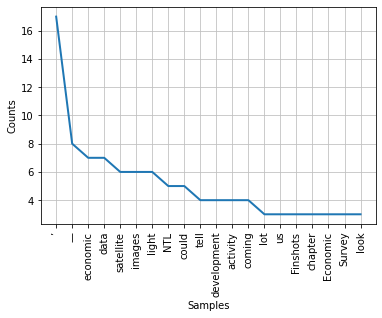

In [18]:
frequency_distribution.plot(20)

In [19]:
final_string=' '.join([i for i in punctuation_removed if not i.isdigit()])

Creating a Word Cloud to get some idea of the what the article is about

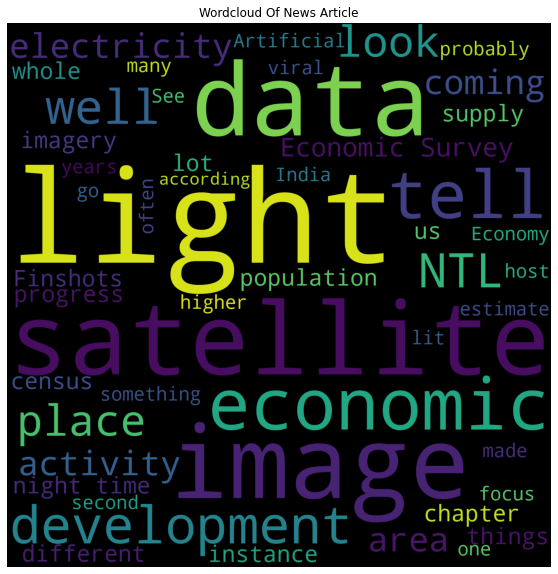

In [20]:
plt.subplots(figsize=(16,10))
wordcloud = WordCloud(
                          background_color='black',
                          max_words=50,
                          width=1500,
                          height=1500
                         ).generate(final_string)
plt.imshow(wordcloud)
plt.title('Wordcloud Of News Article')
plt.axis('off')
plt.show()

In [21]:
# printing collocations
# A collocation is a sequence of words that shows up often
new_text = nltk.text.Text(words_in_text)
# len(new_text)
new_text.collocations()

Economic Survey; satellite imagery; Budget 2022; economic activity;
whole host; NTL data; census data; light coming


In [22]:
# printing concordence
# When you use a concordance, you can see each time a word is used, along with its immediate context
new_text.concordance("NTL")

Displaying 5 of 5 matches:
ory will focus on Night Time Lights ( NTL ) since it has some amazing visual ap
spurt in a given area . You could use NTL data to deduce this and more . It can
Dartmouth College combined census and NTL data to conclude that Uttarakhand , J
 overestimates of economic data. ” So NTL data can offer insights on some occas
ling with these data sets . So yeah , NTL could become a useful tool to assess 


In [23]:
new_text.concordance("economic")

Displaying 10 of 10 matches:
hots we explore a chapter from the Economic Survey that has gone pretty viral 
onsumption . It can tell you about economic progress and a whole host of other
nd this was made apparent when the Economic Survey 2021–2022 dedicated a whole
u something . And according to the economic survey it “ provides an interestin
cal distribution of population and economic activity , urban expansion as well
on income inequality . If you have economic activity concentrated in one area 
aging was never conceived to study economic activity . In fact , most satellit
tivity in both buildings . But the economic output is vastly different.And fin
fect , leading to overestimates of economic data. ” So NTL data can offer insi
that the pictures presented in the Economic Survey do in fact accurately refle


performing Named Entity Recognition .
Named Entity Recognition (NER) is the process of locating named entities in unstructured text and then classifying them into pre-defined categories, such as person names, organizations, locations, monetary values, percentages, time expressions, and so on.

In [24]:
# named entity recognition using spacy
nlp = spacy.load("en_core_web_sm")
doc = nlp(main_text)
displacy.render(doc, style='ent', jupyter=True, options={'distance': 90})

In [25]:
sentences = []
# for sentence in sentences:
#   print(sentence)

In [26]:
len(list(doc.sents))

72

Creating a List of all the sentences

In [27]:
for sentence in doc.sents:
  sentences.append(sentence)

len(sentences)

72

In [28]:
sentences[11]

Think about it — Artificial lights often equate to more houses, more shops and a higher population density.

##SENTIMENT ANALYSIS USING NLTK:
we will be using NLTK's pretrained sentiment analyzer called VADER (Valence Aware Dictionary and sEntiment Reasoner).



In [29]:
sia = SentimentIntensityAnalyzer()


In [30]:
nltk_sentiments = []
for sentence in sentences:
  string = str(sentence)
  sentiment = sia.polarity_scores(string)
  negative = sentiment["neg"]
  positive = sentiment["pos"]
  neutral = sentiment["neu"]
  compound = sentiment["compound"]
  nltk_sentiments.append([string,positive,negative,neutral,compound])


In [31]:
nltk_sentiments[12]

['It gives you a good estimate of electricity consumption.',
 0.293,
 0.0,
 0.707,
 0.4404]

In [32]:
sentences[12]

It gives you a good estimate of electricity consumption.

In [33]:
df_nltk = pd.DataFrame(nltk_sentiments, columns =['Sentence', 'Positivity', 'Negativity','Neutral','Compound'])
df_nltk.head()

,Sentence,Positivity,Negativity,Neutral,Compound
0,22\n/ Economy\n\n,0.000,0.000,1.000,0.0000
1,"Look Ma, India is shining!\n\n\n\n\n\n\n",0.000,0.000,1.000,0.0000
2,"Yes, we know we’ve written a lot about economi...",0.098,0.000,0.902,0.2144
3,Because in today’s Finshots we explore a chapt...,0.176,0.000,0.824,0.4939
4,"And viral is always exciting, no?\n",0.340,0.234,0.426,0.2500


In [34]:
df_nltk.iloc[12,:]

Sentence      It gives you a good estimate of electricity co...
Positivity                                                0.293
Negativity                                                  0.0
Neutral                                                   0.707
Compound                                                 0.4404
Name: 12, dtype: object

In [35]:
df_nltk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sentence    72 non-null     object 
 1   Positivity  72 non-null     float64
 2   Negativity  72 non-null     float64
 3   Neutral     72 non-null     float64
 4   Compound    72 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.9+ KB


Text(0.5, 6.79999999999999, 'Sentence Polarity : nltk')

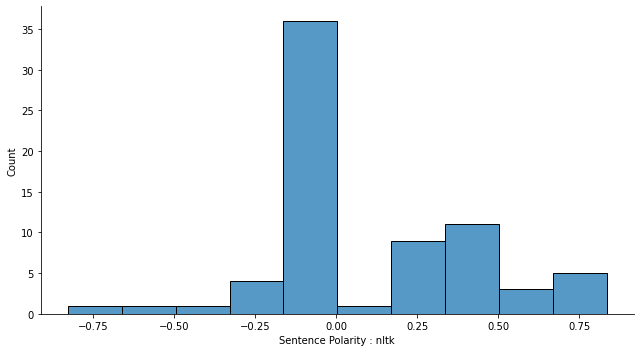

In [36]:
sns.displot(df_nltk["Compound"], height= 5, aspect=1.8)
plt.xlabel("Sentence Polarity : nltk")

Polarity of a large number of sentences is slightly towards negative and it's justified as the article does talk about why we cannot rely on sataellite imagery to draw conclusions about economic progress.

##SENTIMENT ANALYSIS USING TEXTBLOB:

In [37]:
textblob_sentiment=[]
for sentence in sentences:
    string = str(sentence)
    sentiment= TextBlob(string)
    polarity= sentiment.sentiment.polarity
    subjectivity= sentiment.sentiment.subjectivity
    textblob_sentiment.append([string,polarity,subjectivity])

In [38]:
textblob_sentiment[12]

['It gives you a good estimate of electricity consumption.',
 0.7,
 0.6000000000000001]

In [39]:
df_textblob = pd.DataFrame(textblob_sentiment, columns =['Sentence', 'Polarity', 'Subjectivity'])

In [40]:
df_textblob.head()

,Sentence,Polarity,Subjectivity
0,22\n/ Economy\n\n,0.000,0.0
1,"Look Ma, India is shining!\n\n\n\n\n\n\n",0.000,0.0
2,"Yes, we know we’ve written a lot about economi...",0.500,0.5
3,Because in today’s Finshots we explore a chapt...,0.225,0.6
4,"And viral is always exciting, no?\n",0.300,0.8


In [41]:
df_textblob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sentence      72 non-null     object 
 1   Polarity      72 non-null     float64
 2   Subjectivity  72 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.8+ KB


Text(0.5, 6.79999999999999, 'Sentence Polarity :Textblob')

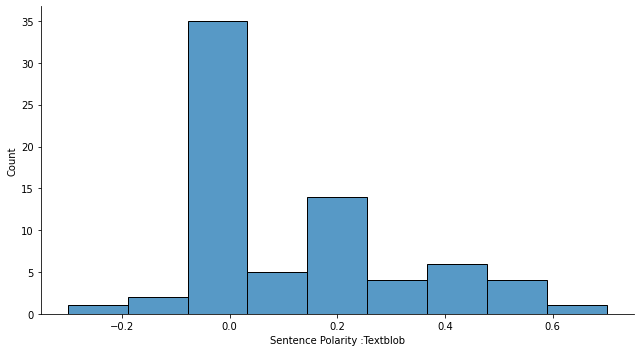

In [42]:
sns.displot(df_textblob["Polarity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Polarity :Textblob")

WE get a polarity dsitribution similar to the one we obtained using NLTK's sentiment analyser VADER

PLotting Subjectivity dsitribution.
Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information.

Text(0.5, 6.79999999999999, 'Sentence Subjectivity :Textblob')

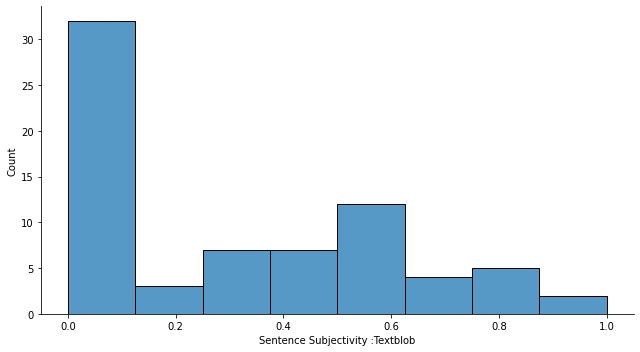

In [43]:
sns.displot(df_textblob["Subjectivity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Subjectivity :Textblob")

We can conclude that the artcicle contains Mostly factual information and less opinion